In [1]:
import pandas as pd

In [2]:
headers = ['age', 'workclass', 'fnlwgt',   
           'education', 'education-num',   
           'marital-status', 'occupation',   
           'relationship', 'race', 'sex',   
           'capital-gain', 'capital-loss',   
           'hours-per-week', 'country',   
           'income-level']
adultData = pd.read_csv('dataset/adult.data',   
                       header=None,   
                       names=headers,   
                       sep=',\s',   
                       na_values=["?"],   
                       engine='python') 
adultTest = pd.read_csv('dataset/adult.test',   
                       header=None,   
                       names=headers,   
                       sep=',\s',   
                       na_values=["?"],   
                       engine='python',
                       skiprows=1)

In [3]:
dataset = adultData.append(adultTest)
dataset.reset_index(inplace=True, drop=True)

In [4]:
dataset.dropna(axis=0, how='any', inplace=True)
dataset.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income-level
count,45222.000000,45222,4.522200e+04,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,NaN,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,22654
mean,38.547941,NaN,1.897347e+05,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,1.056392e+05,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173882e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783160e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379260e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
dataset['income-level'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [6]:
filter1=(dataset['income-level']=='<=50K.','income-level')
filter2=(dataset['income-level']=='>50K.','income-level')
dataset.loc[filter1]='<=50K'
dataset.loc[filter2]='>50K'
dataset['income-level'].value_counts()

<=50K    34014
>50K     11208
Name: income-level, dtype: int64

<Axes: xlabel='count', ylabel='country'>

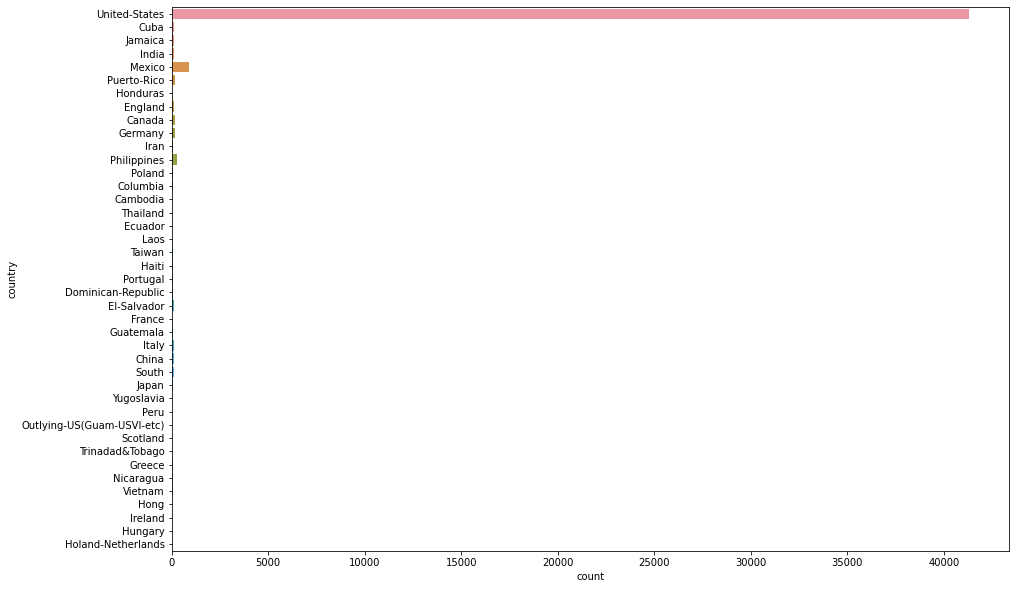

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10)) 
sns.countplot(y='country',data=dataset)

<Axes: xlabel='country', ylabel='count'>

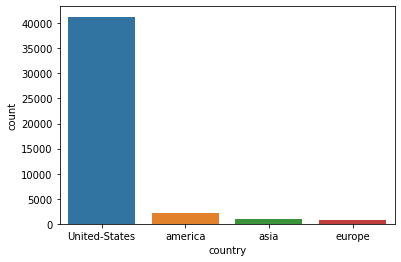

In [8]:
asia = ['India','China','Hong','Japan','Taiwan','Thailand','Vietnam','Laos','Philippines','Cambodia','South']
america = ['Canada','Columbia','Cuba','Dominican-Republic','Ecuador','Guatemala','El-Salvador','Haiti','Honduras','Mexico','Nicaragua','Peru','Jamaica','Puerto-Rico','Trinadad&Tobago']
europe = ['England','Ireland','Scotland','France','Germany','Italy','Holand-Netherlands','Greece','Hungary','Iran','Yugoslavia','Poland','Portugal']

for country in asia:
    dataset.loc[dataset['country']==country,'country']='asia'

for country in america:
    dataset.loc[dataset['country']==country,'country']='america'
    
for country in europe:
    dataset.loc[dataset['country']==country,'country']='europe'

dataset.loc[dataset['country']=='Outlying-US(Guam-USVI-etc)','country']='United-States'

sns.countplot(x='country',data=dataset)

In [9]:
dataset = dataset.drop(['education','fnlwgt'],axis=1)

In [10]:
obj_col = [col for col in dataset.columns if dataset[col].dtype == 'object']
for col in obj_col:
    dataset[col] = dataset[col].factorize()[0]

dataset.describe(include='all')

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income-level
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,2.109239,10.118460,1.078480,4.628013,1.517469,0.211203,0.324952,1101.430344,88.595418,40.938017,0.143094,0.247844
std,13.217870,0.940460,2.552881,1.225909,3.436685,1.433022,0.612877,0.468362,7506.430084,404.956092,12.007508,0.520665,0.431766
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,13.000000,1.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,6.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,3.000000,1.000000


In [11]:
from sklearn.model_selection import train_test_split

x_data = dataset.iloc[:,dataset.columns !='income-level']
y_data = dataset.iloc[:,dataset.columns =='income-level']

x_train,x_test,y_train,y_test = train_test_split(  
    x_data,  
    y_data,  
    test_size=0.2,  
    random_state=0,  
    stratify=y_data)  

In [12]:
def learning_curve_for_hyperparameter(clf, param_name, param_range):
    fig=plt.figure(figsize=(10,5))
    plt.plot(param_range,clf.cv_results_['mean_test_score'],'ko-')
    bestvalue=clf.best_params_[param_name]
    bestscore=clf.best_score_
    plt.plot(bestvalue,bestscore,'rs')
    best='['+str(bestvalue)+' '+str(bestscore)+']'
    plt.annotate(best,xytext=(bestvalue,bestscore),xy=(bestvalue,bestscore))
    plt.show()

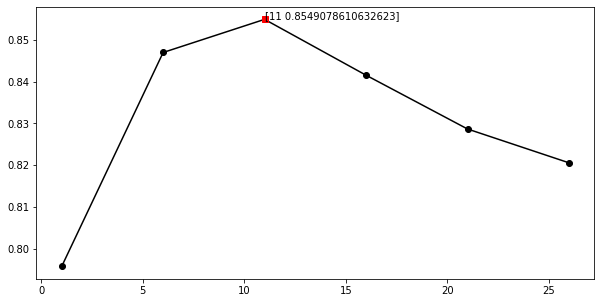

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

max_depth=np.arange(1,30,5)
param0= {'max_depth':max_depth}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param0)
clf.fit(x_train,y_train)
learning_curve_for_hyperparameter(clf,'max_depth',max_depth)

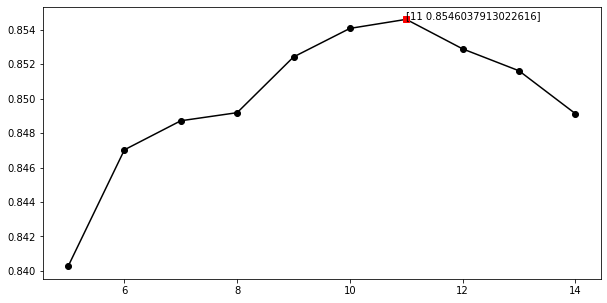

In [14]:
max_depth=np.arange(5,15)
param0= {'max_depth':max_depth}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param0)
clf.fit(x_train,y_train)
learning_curve_for_hyperparameter(clf,'max_depth',max_depth)

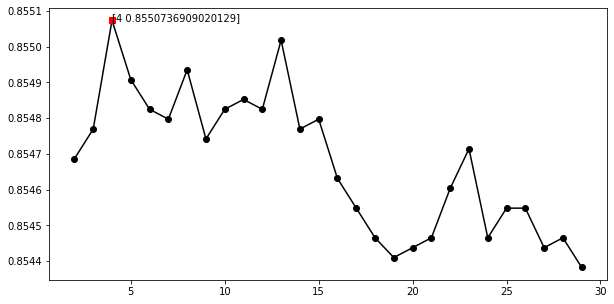

In [15]:
min_samples_split=np.arange(2,30)
param1={'max_depth':[11],'min_samples_split':min_samples_split}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param1)
clf.fit(x_train,y_train)
learning_curve_for_hyperparameter(clf,'min_samples_split',min_samples_split)

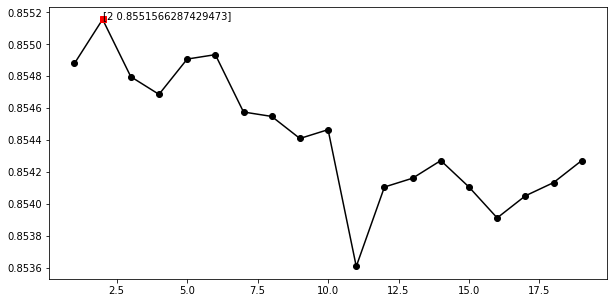

In [16]:
min_samples_leaf=np.arange(1,20)
param2={'max_depth':[11],'min_samples_split':[11],'min_samples_leaf':min_samples_leaf}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param2)
clf.fit(x_train,y_train)
learning_curve_for_hyperparameter(clf,'min_samples_leaf',min_samples_leaf)

In [17]:
import time
from sklearn import metrics

def model_performance(clf,name,ravel=False):
    train_start=time.time()
    if ravel==True:
        model=clf.fit(x_train,y_train.values.ravel())
    else:
        model=clf.fit(x_train,y_train)
    train_end=time.time()
    pred_start=time.time()
    y_pred=model.predict(x_test)
    pred_end=time.time()
    print(name+": ")
    print("Parameters for the best model: ")
    print(clf.best_params_)
    print("Best cross validation score: %s" % round(clf.best_score_*100,2))
    print("Training time(secs): %s" % round(train_end-train_start,5))
    print("Predicting time(secs): %s" % float(pred_end-pred_start))
    acc = round(model.score(x_test, y_test) * 100, 2)
    print("Test accuracy: %s" % acc)
    print("------------------------------------------------")
    print(metrics.classification_report(y_test, y_pred)) 
    return acc,y_pred

In [18]:
param3={'max_depth':[10,11,12],
        'min_samples_split':[5,6,7,8,9,10,11],
        'min_samples_leaf':[1,2,3,4,5]}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param3)

acc_dt,pred_dt=model_performance(clf,"Desicion Tree Classifier")
probs_dt = clf.predict_proba(x_test)[:,1]

Desicion Tree Classifier: 
Parameters for the best model: 
{'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 5}
Best cross validation score: 85.53
Training time(secs): 29.38022
Predicting time(secs): 0.0
Test accuracy: 85.59
------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6803
           1       0.77      0.59      0.67      2242

    accuracy                           0.86      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.86      0.85      9045



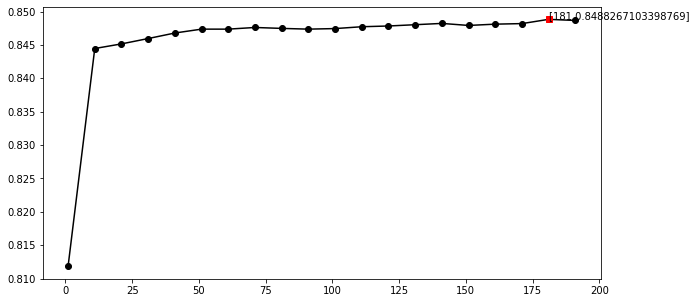

In [19]:
from sklearn.ensemble import RandomForestClassifier 

n_estimators=np.arange(1,200,10)
param0= {'n_estimators':n_estimators}
clf = GridSearchCV(RandomForestClassifier(random_state=90),param_grid=param0)
clf.fit(x_train,y_train.values.ravel())
learning_curve_for_hyperparameter(clf,'n_estimators',n_estimators)

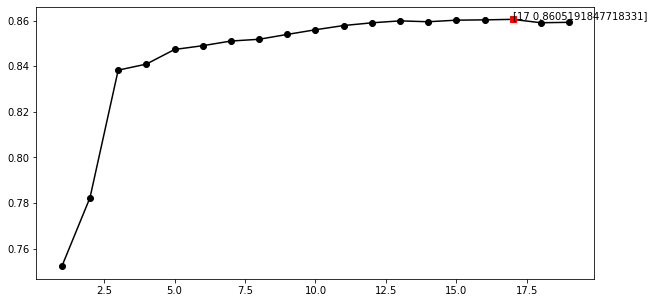

In [20]:
max_depth=np.arange(1,20)
param1= {'n_estimators':[50],'max_depth':max_depth}
clf = GridSearchCV(RandomForestClassifier(random_state=90),param_grid=param1)
clf.fit(x_train,y_train.values.ravel())
learning_curve_for_hyperparameter(clf,'max_depth',max_depth)

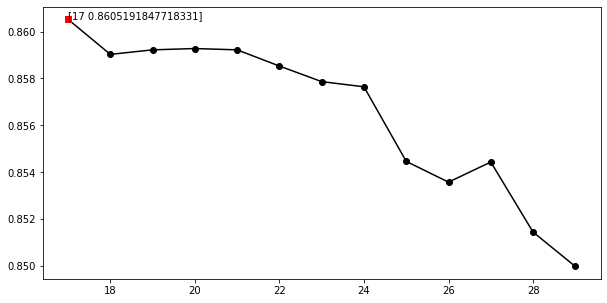

In [21]:
max_depth=np.arange(17,30)
param2= {'n_estimators':[50],'max_depth':max_depth}
clf = GridSearchCV(RandomForestClassifier(random_state=90),param_grid=param2)
clf.fit(x_train,y_train.values.ravel())
learning_curve_for_hyperparameter(clf,'max_depth',max_depth)

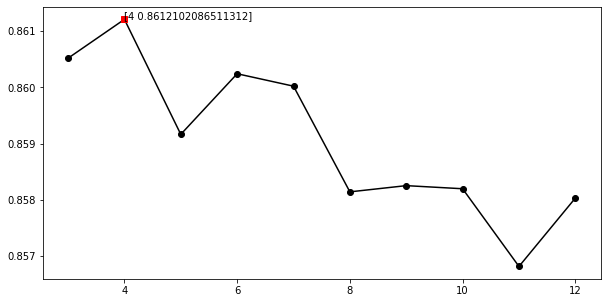

In [22]:
max_features=np.arange(3,13)
param3= {'n_estimators':[50],'max_depth':[17],'max_features':max_features}
clf = GridSearchCV(RandomForestClassifier(random_state=90),param_grid=param3)
clf.fit(x_train,y_train.values.ravel())
learning_curve_for_hyperparameter(clf,'max_features',max_features)

In [23]:
param4={'n_estimators':[50],
        'max_depth':[15,16,17],
        'max_features':[3,4,5],
        'min_samples_leaf':[1,2,3],
        'min_samples_split':[2,3,4]}
clf = GridSearchCV(RandomForestClassifier(random_state=90),param_grid=param4)
acc_rf,pred_rf=model_performance(clf,"Random Forest Classifier",ravel=True)
probs_rf = clf.predict_proba(x_test)[:,1]

Random Forest Classifier: 
Parameters for the best model: 
{'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Best cross validation score: 86.15
Training time(secs): 365.695
Predicting time(secs): 0.05999922752380371
Test accuracy: 86.18
------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6803
           1       0.79      0.60      0.68      2242

    accuracy                           0.86      9045
   macro avg       0.83      0.78      0.80      9045
weighted avg       0.86      0.86      0.86      9045



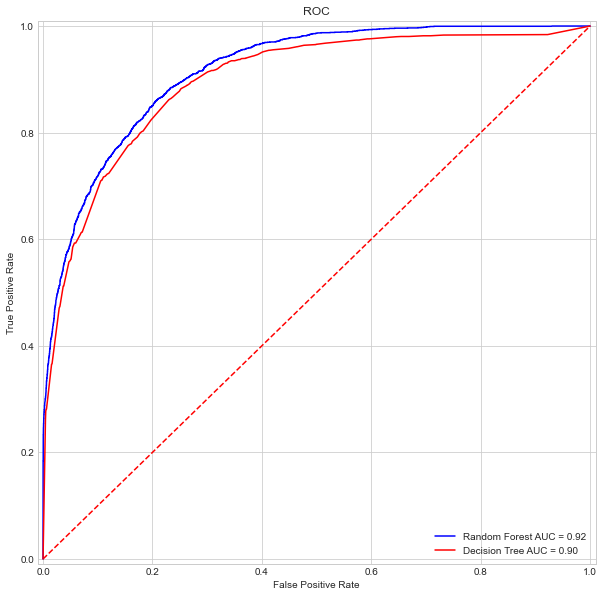

In [24]:
plt.style.use("seaborn-v0_8-whitegrid")  
fig = plt.figure(figsize=(10,10))   
models = [    
    'Random Forest',    
    'Decision Tree'
]  
probs = [  
    probs_rf,    
    probs_dt
]  
colors = ['b','r']  
plt.title('ROC')  
plt.plot([0, 1], [0, 1],'r--')  
plt.xlim([-0.01, 1.01])  
plt.ylim([-0.01, 1.01])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
def plot_roc_curves(y_test, prob, model):  
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)  
    roc_auc = metrics.auc(fpr, tpr)  
    label = model + ' AUC = %0.2f' % roc_auc  
    plt.plot(fpr, tpr, label=label, color=colors[i])  
    plt.legend(loc = 'lower right')    
for i, model in list(enumerate(models)):  
    plot_roc_curves(y_test, probs[i], models[i])

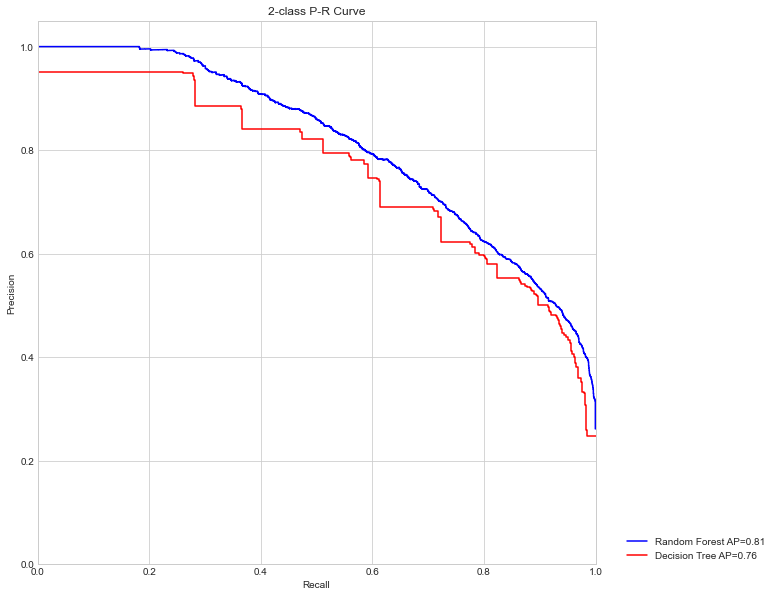

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

fig = plt.figure(figsize=(10,10))   
plt.xlabel('Recall')    
plt.ylabel('Precision')    
plt.ylim([0.0, 1.05])    
plt.xlim([0.0, 1.0])   
plt.title('2-class P-R Curve')   
def pr_curve_overall(y_test, probs, model):    
    precision, recall, _ = precision_recall_curve(y_test, probs)    
    label = (model + ' AP={0:0.2f}'.format(average_precision_score(y_test, probs)))  
    plt.step(recall, precision, color=colors[i],     
             where='post', label=label)    
    plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)   
for i, model in list(enumerate(models)):  
    pr_curve_overall(y_test, probs[i], models[i])  

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

acc=[acc_rf,acc_dt]
precision=[precision_score(y_test,pred_rf),
          precision_score(y_test,pred_dt)]
recall=[recall_score(y_test,pred_rf),
       recall_score(y_test,pred_dt)]
f1=[f1_score(y_test,pred_rf,average='binary'),
   f1_score(y_test,pred_dt,average='binary')]
comparison=pd.DataFrame({'models':models,'acc':acc,'precision':precision,'recall':recall,'f1':f1})
comparison.sort_values(by='acc', ascending=False) 

,models,acc,precision,recall,f1
0,Random Forest,86.18,0.789044,0.603925,0.684184
1,Decision Tree,85.59,0.773124,0.592774,0.671043
